
# <center><font style="color:rgb(100,109,254)">Manipulating Image ROI & Channels</font><center>



## Region Of Interest (ROI) & Image properties

###  <font style="color:rgb(134,19,348)">Loading Required Libraries</font>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

###  <font style="color:rgb(134,19,348)">How to get value of a single pixel</font>

In [2]:
img = cv2.imread('media/M2/party.jpg',1)
imgc = img.copy()

px = imgc[55,55]
#now we can print that pixel to see its values
print(px)

[ 88  89 103]


###  <font style="color:rgb(134,19,348)">Modify that pixel</font>

In [3]:
imgc[55,55]= 0

###  <font style="color:rgb(134,19,348)">Reference an ROI, or Region of Interest</font>

In [25]:
px = imgc[150:153,150:153] # y,x or rows , cols  
print(px)

[[[210 225 221]
  [207 224 220]
  [202 223 224]]

 [[212 233 225]
  [213 234 226]
  [206 235 220]]

 [[219 245 222]
  [214 242 219]
  [219 236 227]]]


###  <font style="color:rgb(134,19,348)">Similarly we can modify ROI of Image</font>

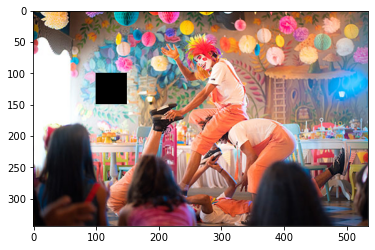

In [18]:
imgc = img.copy()
imgc[100:150,100:150] = 0  # 0 means black so we are making this region black
plt.imshow(imgc[...,::-1])  # See we made a black square on that image

### <font style="color:rgb(134,19,348)">Task 4: Modify the code to make clowns face white</font>


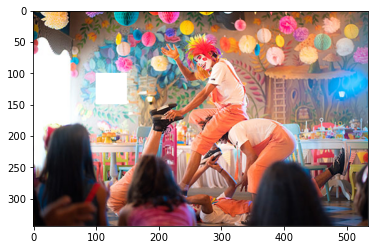

In [17]:
imgc = img.copy()
#ADD CODE BELOW
imgc[100:150,100:150] =255          # ~ 1 line of code   
plt.imshow(imgc[...,::-1])  

###  <font style="color:rgb(134,19,348)">This is how we can get rows,cols of an Image</font>

In [29]:
rows,cols,channels = imgc.shape 
print(rows)
print(cols)
#print(channels)

344
535


###  <font style="color:rgb(134,19,348)">We can also make the Roi equal to any color</font>

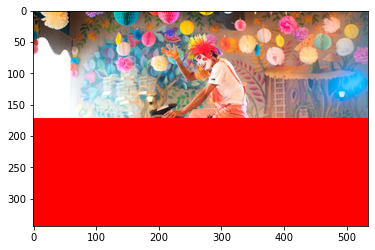

In [15]:
imgc = img.copy()
imgc[rows//2:rows,0:cols] =  [0,0,255]         # Colors are in this order blue,green,red or b,g,r

plt.imshow(imgc[...,::-1])  

###  <font style="color:rgb(34,169,134)">Assignment: We have made the bottom horizontal half red now you should Make the the right vertical half of the image blue</font>

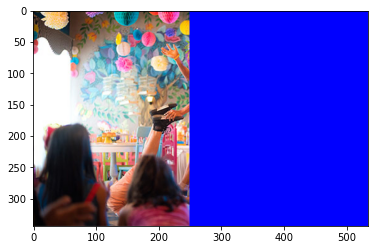

In [28]:
imgc = img.copy()
#ADD CODE BELOW
imgc[0:cols,250:cols] =[255,0,0]           # ~ 1 line of code   
plt.imshow(imgc[...,::-1])  

In [31]:
# Image Properties
print('The shape of the Image is: {}'.format(img.shape))
print('The size of the Image is: {} You can get this value by doing cols * rows * channels'.format(img.size))
print('The data type of the Image is: {}'.format(img.dtype))
print('The dimensions of the Image is: {}'.format(img.ndim))


The shape of the Image is: (344, 535, 3)
The size of the Image is: 552120 You can get this value by doing cols * rows * channels
The data type of the Image is: uint8
The dimensions of the Image is: 3


###  <font style="color:rgb(134,19,348)"> Remember you can represent an image in two data types using matplotlib</font>
1. In uint8 (8 bit image) , then image will be in range 0-255 where 0 in black and 255 is white
2. In float (32 bit image) , then image will be in range 0-1 where 0 is black and 255 is white

##  <font style="color:rgb(134,19,348)">Working with Image Channels</font>
We can even access any channel's intensity at a certain pixel

In [32]:
import cv2
img = cv2.imread('media/M2/avengers.jpg',1)
imgc = img.copy()
# We can acces only the blue pixel at location 100,100  blue = img[100,100,0]
blue = img[100,100,0]
print('The intensity of blue at this location is: {}'.format(blue)) 

The intensity of blue at this location is: 215


###  <font style="color:rgb(134,19,348)">We can split all three channels of our BGR Image
</font> We can do this by using `cv2.split()`

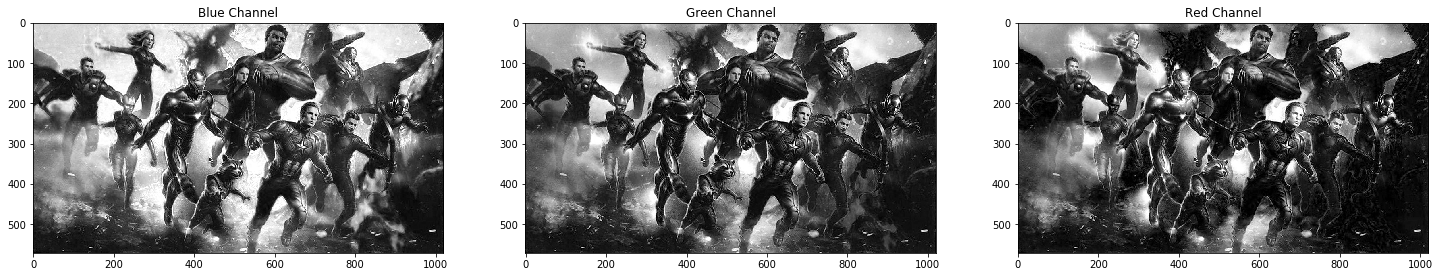

In [33]:
b,g,r = cv2.split(img)  #get bgr channels seperately
plt.figure(figsize=[25,25])
plt.subplot(131);plt.imshow(b,cmap='gray');plt.title("Blue Channel")
plt.subplot(132);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(133);plt.imshow(r,cmap='gray');plt.title("Red Channel");

###  <font style="color:rgb(134,19,348)">Now Lets have an image in which one of three channels is Absent
</font>

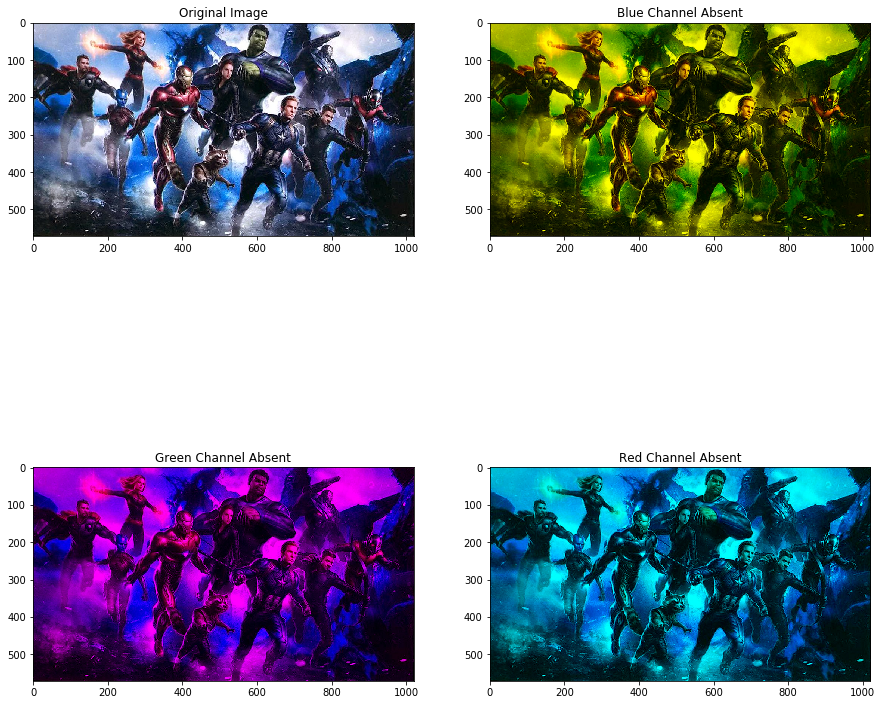

In [34]:
im1 =img.copy() 
im2 =img.copy()
im3 =img.copy()

im1[:,:,0] = 0
im2[:,:,1] = 0
im3[:,:,2] = 0

plt.figure(figsize=[15,15])
plt.subplot(221);plt.imshow(img[:,:,::-1]);plt.title("Original Image");
plt.subplot(222);plt.imshow(im1[:,:,::-1]);plt.title("Blue Channel Absent");
plt.subplot(223);plt.imshow(im2[:,:,::-1]);plt.title("Green Channel Absent");
plt.subplot(224);plt.imshow(im3[:,:,::-1]);plt.title("Red Channel Absent");

###  <font style="color:rgb(34,169,134)">Assignment: Make blue and green channel absent in a single line of code</font>

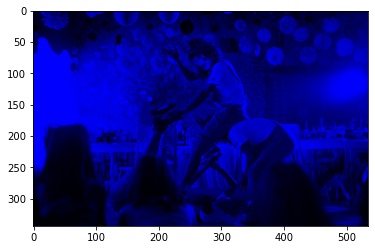

In [34]:
# make blue and green channel absent in a single line of code
im4 =img.copy()
#ADD CODE BELOW
im4[:,:,1] = 0 ;    im4[:,:,2] = 0             # ~1 line of code

plt.imshow(im4[:,:,::-1])

###  <font style="color:rgb(134,19,348)">You can also add border to an Image</font>

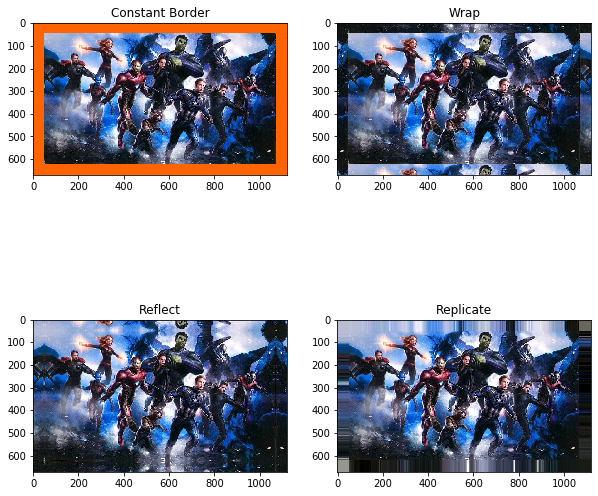

In [35]:
constant = 50
borderimage1= cv2.copyMakeBorder(img,constant,constant,constant,constant,cv2.BORDER_CONSTANT,value=[0,100,255])
borderimage2= cv2.copyMakeBorder(img,constant,constant,constant,constant,cv2.BORDER_WRAP)
borderimage3= cv2.copyMakeBorder(img,constant,constant,constant,constant,cv2.BORDER_REFLECT)
borderimage4= cv2.copyMakeBorder(img,constant,constant,constant,constant,cv2.BORDER_REPLICATE)


plt.figure(figsize=[10,10])
plt.subplot(221);plt.imshow(borderimage1[:,:,::-1]);plt.title("Constant Border");
plt.subplot(222);plt.imshow(borderimage2[:,:,::-1]);plt.title("Wrap");
plt.subplot(223);plt.imshow(borderimage3[:,:,::-1]);plt.title("Reflect");
plt.subplot(224);plt.imshow(borderimage4[:,:,::-1]);plt.title("Replicate");


##  <font style="color:rgb(134,19,348)">Manipulating Image with ROI</font>
Now we have a picture of messi kicking a ball, now as a Ronaldo fan we are going to make messi miss the ball by pasting the Roi of image that contain the ball onto grass and pasting that grass part on the ball part <br>
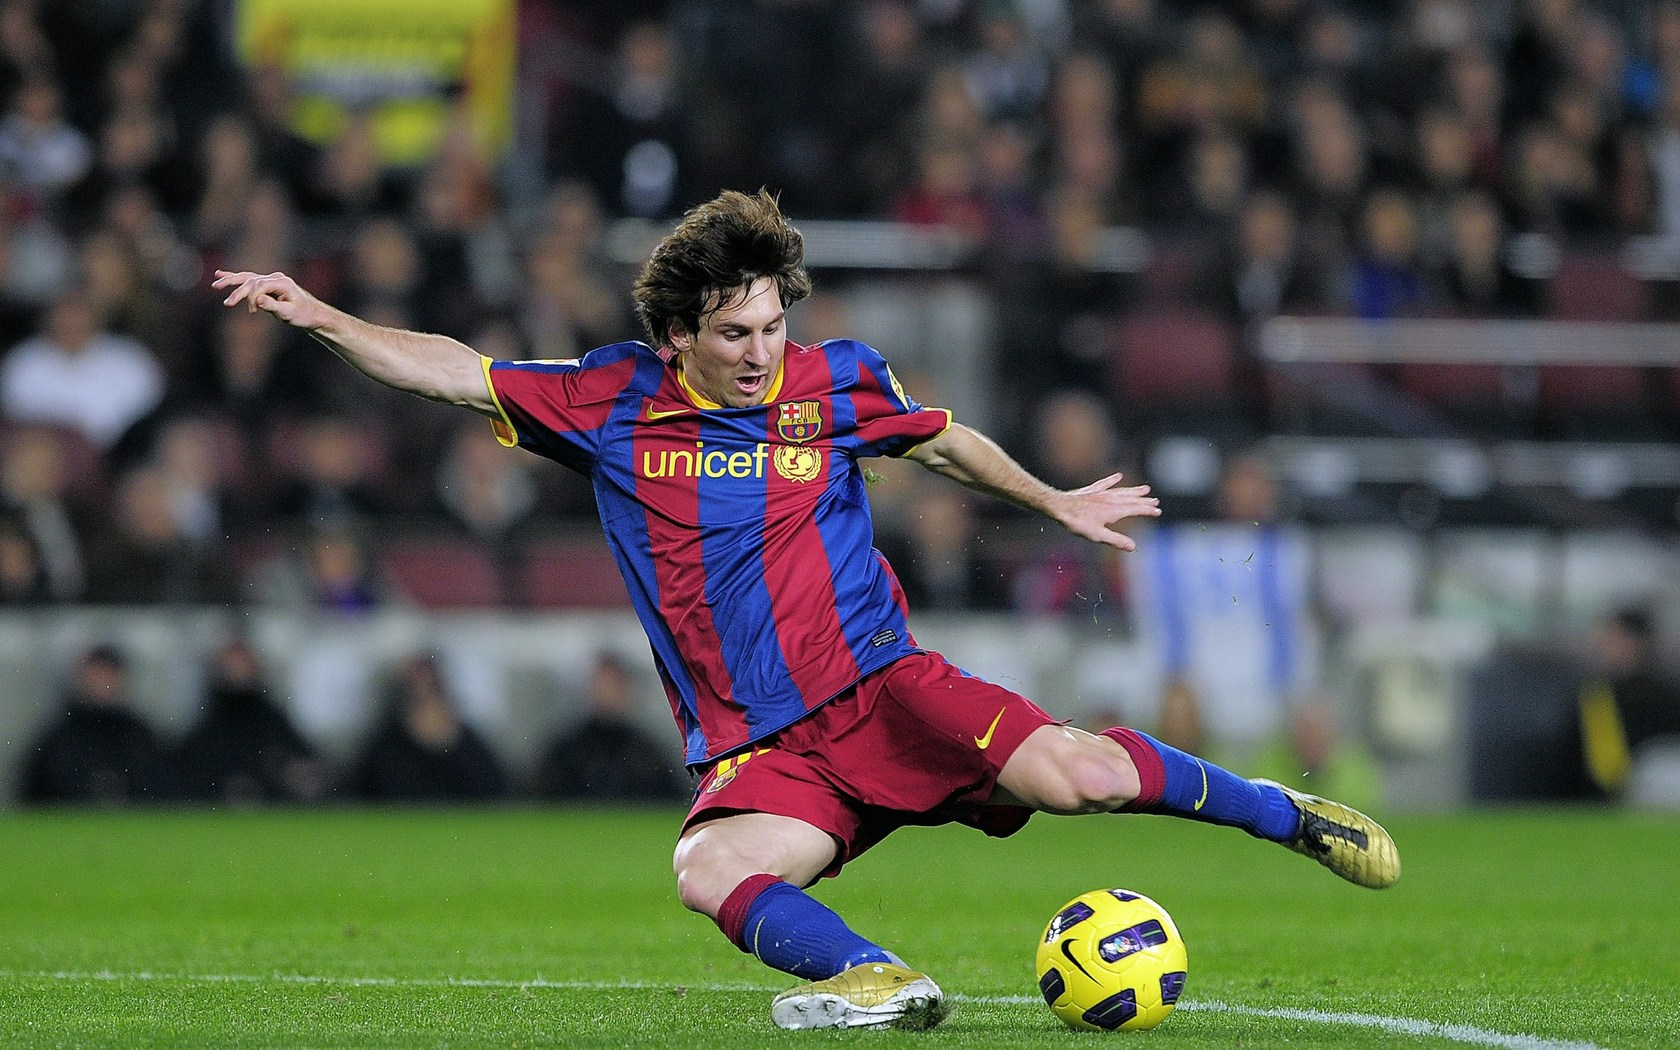

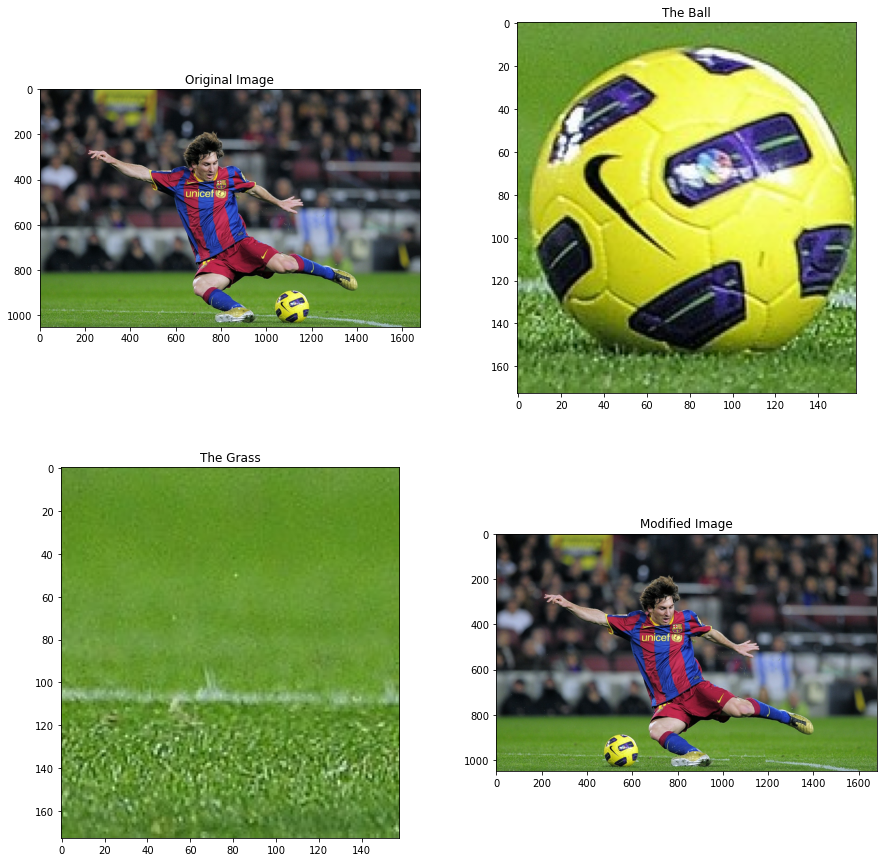

In [35]:
img2 = cv2.imread('media/M2/ballplay.jpeg',1)

original = img2.copy()

ball=img2[877:1050,1030:1188].copy()  # roi containing ball
grass = img2[877:1050, 470:628].copy()  #roi containing grass

img2[877:1050, 470:628] = ball  # pasting ball on grass
img2[877:1050,1030:1188] = grass  # pasting grass on ball

plt.figure(figsize=[15,15])
plt.subplot(221);plt.imshow(original[:,:,::-1]);plt.title("Original Image");
plt.subplot(222);plt.imshow(ball[:,:,::-1]);plt.title("The Ball");
plt.subplot(223);plt.imshow(grass[:,:,::-1]);plt.title("The Grass");
plt.subplot(224);plt.imshow(img2[:,:,::-1]);plt.title("Modified Image");

###  <font style="color:rgb(34,169,134)"> Assignment: I bet all messi fans are angry and now they want to take revenge on Ronaldo using Image processing, well you're lucky, now's your chance, do with ronaldo what you did with messi </font><br>
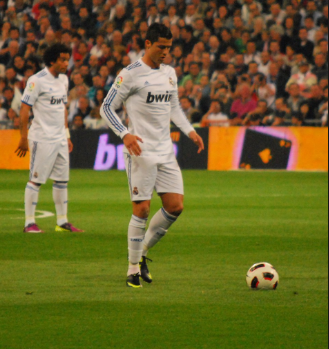

<IPython.core.display.Javascript object>


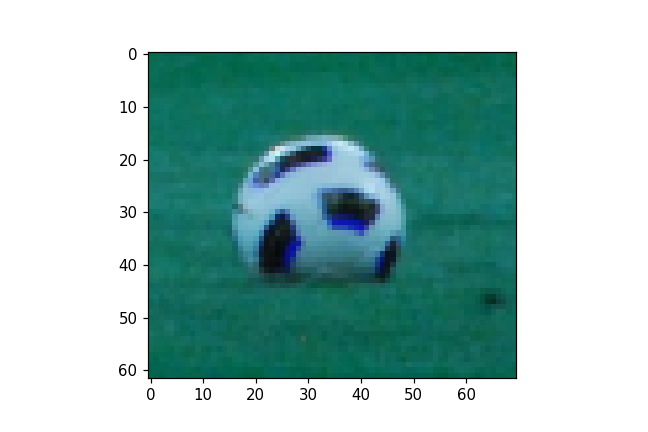

In [56]:
imgr = cv2.imread('media/M2/rball.png',1)
%matplotlib notebook
imgr1 = cv2.cvtColor(imgr,cv2.COLOR_RGB2BGR)
plt.imshow(imgr1)

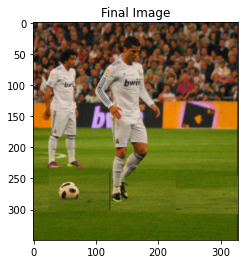

In [94]:
imgr = cv2.imread('media/M2/rball.png',1)
#ADD CODE BELOW
# ~4-6 lines of code
football = imgr[246:308,230:362].copy()
#plt.subplot(121);plt.imshow(football[:,:,::-1]);plt.title("Football")
grass = imgr[240:302,25:125].copy()
#plt.subplot(122);plt.imshow(grass[:,:,::-1]);plt.title("Grass")
imgr[246:308,229:360]=grass
imgr[240:302,25:124]=football

plt.imshow(imgr[:,:,::-1]);plt.title("Final Image");